In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential , Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D , Dropout , AveragePooling1D ,Input 
from tensorflow import unique
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/my_datasets/5dB_12Schemes.csv',header= None)
print("Read Complete")

Read Complete


In [4]:
print(data.shape)



(13387, 3001)


In [5]:
print( data.iloc[:,-1] )

0        QAM-16
1        QAM-16
2        QAM-16
3        QAM-16
4        QAM-16
          ...  
13382    FSK-32
13383    FSK-32
13384    FSK-32
13385    FSK-32
13386    FSK-32
Name: 3000, Length: 13387, dtype: object


In [6]:
# ## Graph creation 
# ##take first row 

# FR = data.iloc[0 , :-1]
# print(FR.shape)

# # Create plot
# plt.plot(FR, color='red')
# plt.xlabel('x-axis')
# plt.ylabel('y-axis')
# plt.savefig('/content/drive/MyDrive/my_datasets\FR.pdf')
# # Show plot
# plt.show()

In [7]:
Label = data.iloc[:,-1]
print(Label)

#Just checking 0 to 1500 labels no use in code write now
print("First 1500 labels" , data.iloc[0:1500 , -1])

0        QAM-16
1        QAM-16
2        QAM-16
3        QAM-16
4        QAM-16
          ...  
13382    FSK-32
13383    FSK-32
13384    FSK-32
13385    FSK-32
13386    FSK-32
Name: 3000, Length: 13387, dtype: object
First 1500 labels 0       QAM-16
1       QAM-16
2       QAM-16
3       QAM-16
4       QAM-16
         ...  
1495    QAM-64
1496    QAM-64
1497    QAM-64
1498    QAM-64
1499    QAM-64
Name: 3000, Length: 1500, dtype: object


In [8]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 3000
data.iloc[:,-1] =  label_encoder.fit_transform(Label) 


<ipython-input-8-6c5d91719daf>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,-1] =  label_encoder.fit_transform(Label)


In [9]:
print(label_encoder.classes_)  # The index of the label in le.classes_ is the encoded value of the label.

['BPSK' 'FSK-16' 'FSK-2' 'FSK-32' 'FSK-4' 'FSK-8' 'QAM-128' 'QAM-16'
 'QAM-256' 'QAM-32' 'QAM-64' 'QPSK']


In [10]:
TotalLabel = len(list(label_encoder.classes_))

print("Total Number of Dense Layer ouputs:" , TotalLabel)

Total Number of Dense Layer ouputs: 12


In [11]:
new_data = data
print(new_data)

           0         1         2         3         4         5         6     \
0      0.031617 -0.067080  0.903714 -0.142399  0.003876  0.249397  0.726127   
1      0.016724  0.105625  0.389050  0.022462 -0.390057  0.346232  0.886593   
2      0.038057 -0.135166  0.467208  0.192877 -0.193335 -0.052278  0.596728   
3     -0.049654  0.126743 -0.571123  0.485580  0.750511 -0.481796 -0.801569   
4      0.128086 -0.052980 -0.620960  0.173162 -0.516923  0.182470  0.345500   
...         ...       ...       ...       ...       ...       ...       ...   
13382  1.000000 -0.913175  0.259987 -0.377178  0.308969 -0.679220  0.082247   
13383 -0.477218  1.000000 -1.000000  1.000000 -0.833399  1.000000  0.084597   
13384 -0.195624  0.826563 -0.983764  0.037202 -0.209387  1.000000 -0.435286   
13385 -0.680197  1.000000 -0.421705 -0.250252 -0.543229 -0.528611 -0.717551   
13386 -0.220557 -0.214698 -1.000000 -0.222968 -1.000000 -0.362438 -0.385357   

           7         8         9     ...      2991 

In [12]:

new_data = new_data.interpolate()

  

In [13]:
print(new_data.isnull().sum().sum())
print(new_data.shape)



0
(13387, 3001)


In [14]:
x= new_data.iloc[:,0:-1]
y= new_data.iloc[:, new_data.shape[1]-1 ]
print("Shape of x:" , x.shape)
print("Shape of y:" , y.shape)


Shape of x: (13387, 3000)
Shape of y: (13387,)


In [15]:
#Saving the data for future classification
# convert the NumPy ndarray to a Pandas DataFrame object
# x = pd.DataFrame(x)
# Testing_CSV = x.to_csv('/content/drive/MyDrive/Saved-Model/Processed_test_data_.csv'  , index = False , header = None )

In [17]:

new_CSV = []

for row in x:
  x_denoise = savgol_filter(x[row] ,1001,3)
  new_CSV.append(x_denoise)

print(len(new_CSV))
new_CSV = pd.DataFrame(new_CSV)
print(new_CSV.shape)


3000
(3000, 13387)
(13387, 3000)


In [18]:
## Graph creation 
##take first row 


# FR1 = new_CSV1.iloc[0 , :]
# print(FR1.shape)

# # Create plot
# plt.plot(FR1, color='blue')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend(["Denoised Signal"], loc='lower right')
# plt.savefig('/content/drive/MyDrive/my_datasets/FR1.pdf')
# # Show plot
# plt.show()

In [19]:
# td_x = new_CSV1.iloc[:,:]
# print(td_x.shape)
# from scipy.fftpack import fft
# fd_x = abs(fft(td_x))
# x = np.vstack((td_x,fd_x ))
# print(x.shape)
# y1 = np.hstack((y,y))
# print(y1.shape)

x = new_CSV1.iloc[:,:]
# print(type(x))
print(x.shape)
y1 = y
print(y.shape)


x = x.values.reshape(x.shape[0], x.shape[1], 1)

X_train, X_test, Y_train, Y_test = train_test_split(x,y1, train_size=0.90)
print("X train shape:" , X_train.shape)
print("Y train shape:" ,Y_train.shape)
print("X test shape:" ,X_test.shape)
print("Y test shape:" ,Y_test.shape)


(13387, 3000)
(13387,)
X train shape: (12048, 3000, 1)
Y train shape: (12048,)
X test shape: (1339, 3000, 1)
Y test shape: (1339,)


In [20]:
#Saving the data for future classification
# # convert the NumPy ndarray to a Pandas DataFrame object
# X_test = pd.DataFrame(X_test)
# Testing_CSV = X_test.to_csv('/content/drive/MyDrive/Saved-Model/Processed_test_data_.csv'  , index = False , header = None )

In [21]:



#Proposed light convnet
model = Sequential()
model.add(Conv1D(filters = 64, kernel_size = 1,strides = 1 ,input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size = 2 , strides = 2 ))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(TotalLabel, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size=10,epochs=5, verbose=1 , validation_split=0.30 )
model.summary()



Epoch 1/5
844/844 [==============================] - 15s 5ms/step - loss: 1.4268 - accuracy: 0.5560 - val_loss: 0.5163 - val_accuracy: 0.8722
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.2929 - accuracy: 0.9449 - val_loss: 0.2652 - val_accuracy: 0.9519
Epoch 3/5
844/844 [==============================] - 5s 6ms/step - loss: 0.2070 - accuracy: 0.9629 - val_loss: 0.2335 - val_accuracy: 0.9629
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.1540 - accuracy: 0.9708 - val_loss: 0.1668 - val_accuracy: 0.9693
Epoch 5/5
844/844 [==============================] - 5s 6ms/step - loss: 0.1269 - accuracy: 0.9725 - val_loss: 0.1958 - val_accuracy: 0.9599
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3000, 64)          128       
                                                                 
 max_pooli

In [34]:
import memory_profiler
import time

# Compute inference time per sample
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()
inference_time = (end_time - start_time) / len(X_test)
print(f"Inference time per sample: {inference_time:.4f} seconds")

# # Compute memory usage during training or inference
# memory_usage((model, X_test))

# Compute RMS and MAE metrics
score = model.evaluate(X_test, Y_test, verbose=0)
print(f"RMS: {np.sqrt(score[0]):.4f}")
print(f"MAE: {score[1]:.4f}")


# Load the weights for the model from a file (if applicable)
# model.load_weights('model_weights.h5')

# Print the weights for each layer in the model
for layer in model.layers:
    if layer.get_weights():
        print(layer.name)
        for weight in layer.weights:
            print(weight.shape)
            print(weight)

42/42 [==============================] - 0s 2ms/step
Inference time per sample: 0.0002 seconds
RMS: 0.4711
MAE: 0.9619
conv1d
(1, 1, 64)
<tf.Variable 'conv1d/kernel:0' shape=(1, 1, 64) dtype=float32, numpy=
array([[[ 0.3137821 , -0.10427487,  0.37178382, -0.34881544,
         -0.3751988 ,  0.36348647, -0.14710045,  0.4161262 ,
          0.3412623 ,  0.36977398,  0.39141104,  0.34362814,
          0.15620252, -0.39492086, -0.34508663,  0.3315562 ,
         -0.30290437,  0.37710363, -0.3175797 , -0.36333564,
          0.20437966,  0.2699815 ,  0.4206619 , -0.21327148,
         -0.39036754, -0.24093676, -0.3130037 ,  0.20640436,
         -0.41657382, -0.34706935, -0.32810414, -0.36967304,
         -0.04674924, -0.3665476 ,  0.2664699 , -0.32169312,
         -0.1655118 , -0.39483786,  0.40732664, -0.39534208,
         -0.38743392, -0.28315344,  0.33698243, -0.35942996,
          0.3452991 ,  0.3856935 ,  0.41613412,  0.1875368 ,
          0.11599015, -0.35870072, -0.3371344 ,  0.12654908,


In [35]:
# inputs = Input(shape=(X_train.shape[1], 1))
# conv1 = Conv1D(filters=64, kernel_size=1, strides=1, activation='relu')(inputs)
# pool1 = MaxPooling1D(pool_size=2, strides=2)(conv1)
# flat = Flatten()(pool1)
# dense1 = Dense(32, activation='relu')(flat)
# dense2 = Dense(16, activation='relu')(dense1)
# outputs = Dense(TotalLabel, activation='softmax')(dense2)
# model = Model(inputs=inputs, outputs=outputs)
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train, Y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.30)
# model.summary()


377/377 [==============================] - 1s 4ms/step - loss: 0.1483 - accuracy: 0.9666
Loss: 0.14833281934261322  Accuracy: 0.9666334390640259
42/42 [==============================] - 0s 2ms/step
[[111   0   0   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   1   0   0   0   0   0   0   0]
 [  0   0 111   0   3   0   1   0   0   0   0   1]
 [  0   2   0  88   0   0   0   2   0   0   0   0]
 [  0   0   3   0 118   0   0   0   0   0   1   0]
 [  0   2   0   0   6 119   0   0   0   0   0   0]
 [  0   0   0   0   1   0 112   0   1   0   1   0]
 [  0   0   0   3   0   0   0 114   0   2   1   0]
 [  5   0   0   2   0   0   1   0  96   0   0   0]
 [  0   0   0   0   0   0   0   1   0 106   4   0]
 [  0   0   0   0   0   0   3   0   0   1 102   0]
 [  2   0   1   0   0   0   0   0   0   0   0 106]]


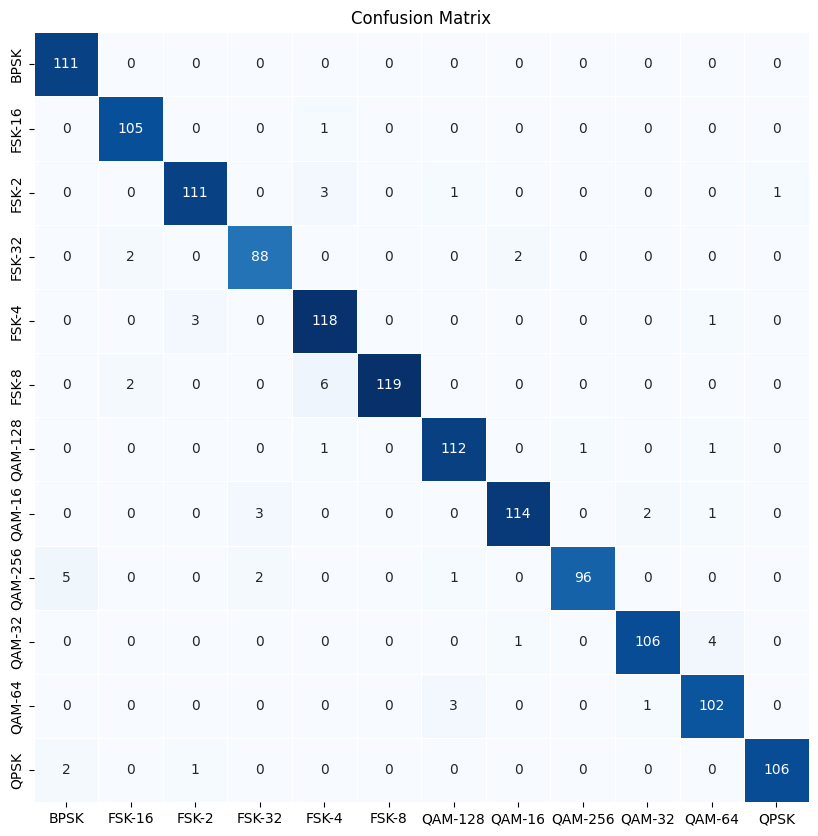

In [36]:
acc = model.evaluate(X_train, Y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])
pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)
cm = confusion_matrix(Y_test, pred_y)
print(cm)

    
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax , cbar=False , linewidths=.5 ,  cmap='Blues' ) ; 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(list(label_encoder.classes_)); 
ax.yaxis.set_ticklabels(list(label_encoder.classes_));


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


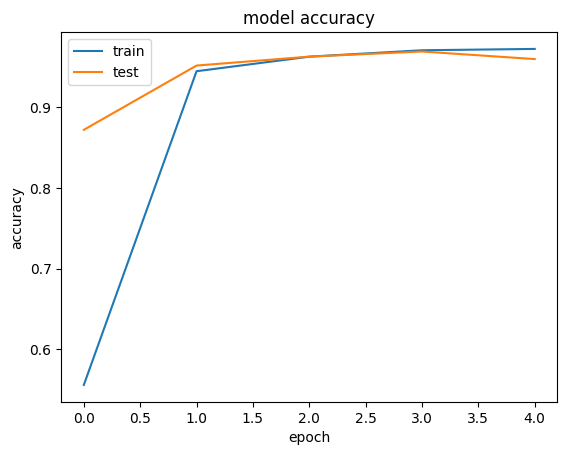

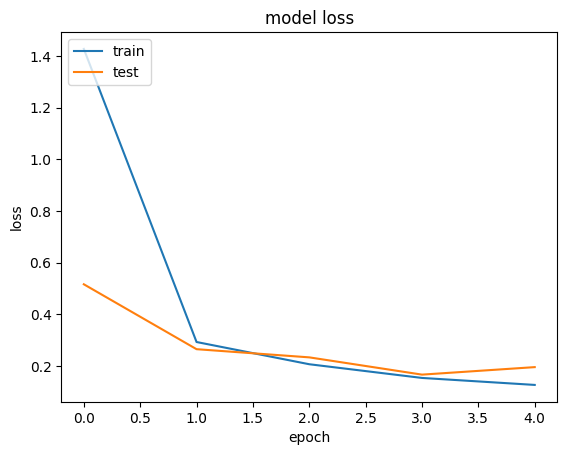

In [37]:
# # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Saved-Model/model_Accuracy.pdf")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Saved-Model/model_loss.pdf")
plt.show()


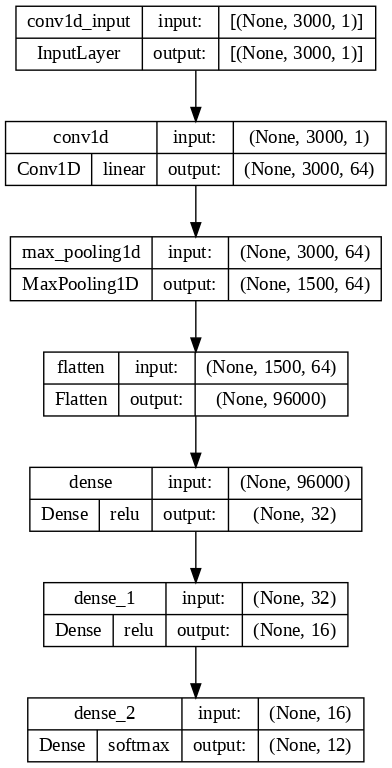

In [38]:
from keras.utils.vis_utils import plot_model
plot_model(
    model,
    to_file='/content/drive/MyDrive/Saved-Model/model_plot.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=100,
    layer_range=None,
    show_layer_activations=True
)

In [39]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Saved-Model/GC1W.h5')



In [40]:
import pickle
with open("/content/drive/MyDrive/Saved-Model/GC1W.pkl", "wb") as f:
  pickle.dump(model, f) 

In [ ]:
#Loading the dataset 
load_tdata = pd.read_csv('/content/drive/MyDrive/my_datasets/5dB_12Schemes.csv',header= None)

print(load_tdata.shape)


In [ ]:
#Doing Pre processing before checking 
load_tdata1 = load_tdata.iloc[0:1500,:-1]
print(load_tdata1.shape)

Saving_Testing_CSV = load_tdata1.to_csv('/content/drive/MyDrive/Saved-Model/Test_File.csv'  , index = False , header = None )


In [ ]:
#pre processing 

load_tdata1 = load_tdata1.interpolate()
print(load_tdata1.isnull().sum().sum())
print(load_tdata1.shape)


from skimage.restoration import  denoise_wavelet 
new_CSV = []
for row in load_tdata1:
  x_denoise = denoise_wavelet(load_tdata1[row] , method = 'BayesShrink' , mode = 'soft' , wavelet_levels= 3 , rescale_sigma='True')
  new_CSV.append(x_denoise)

# print(len(new_CSV))
new_CSV = pd.DataFrame(new_CSV)
# print(new_CSV.shape)
new_CSV = new_CSV.T
print("Shape After Denoising:" , new_CSV.shape)


td_x = new_CSV.iloc[:,:]
from scipy.fftpack import fft
fd_x = abs(fft(td_x))
x = np.vstack((td_x,fd_x ))
print("Shape After FT" , x.shape)
x = x.reshape(x.shape[0], x.shape[1], 1)
print("Final shape after reshaping:" ,x.shape )

In [ ]:
 #Model saving and checking 
# pickle.dump(model, open('/content/drive/MyDrive/Saved-Model/model.pkl', 'wb'))
pickled_model = pickle.load(open('/content/drive/MyDrive/Saved-Model/GC1W.pkl', 'rb'))
Pre = pickled_model.predict(load_tdata1)

Pred_y = Pre.argmax(axis=-1)
print(Pred_y)

Pred_Labels = label_encoder.inverse_transform(Pred_y)
print(Pred_Labels)

In [ ]:
# loaded_model = load_model("/content/drive/MyDrive/Saved-Model/GC1W.h5")

# Pre = loaded_model.predict(load_tdata)
# print(Pre)

# Pred_y = Pre.argmax(axis=-1)
# print(Pred_y)

# Pred_Labels = label_encoder.inverse_transform(Pred_y)
# print(Pred_Labels)

In [ ]:
# Testing_CSV = X_test.to_csv('/content/drive/MyDrive/Saved-Model/testing.csv'  , index = False , header = None )

In [ ]:
# print(Y_test)